<a href="https://colab.research.google.com/github/agrawalkunal2/insurance-cross_sell/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [265]:
# loading necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Supressing warnings
import warnings  
warnings.filterwarnings('ignore')

In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone 3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")


Let's take look and feel of our data

In [268]:
data.head() # first five rows of data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [269]:
data.tail() # last 5 rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [270]:
data.shape # seeing the shape of data

(381109, 12)

In [271]:
# checking the data types of columns present and number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Five Number Summary**

In [272]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109,NaN,NaN,NaN,190555,110017,1,95278,190555,285832,381109
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109,NaN,NaN,NaN,38.8226,15.5116,20,25,36,49,85
Driving_License,381109,NaN,NaN,NaN,0.997869,0.0461095,0,1,1,1,1
Region_Code,381109,NaN,NaN,NaN,26.3888,13.2299,0,15,28,35,52
Previously_Insured,381109,NaN,NaN,NaN,0.45821,0.498251,0,0,0,1,1
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109,NaN,NaN,NaN,30564.4,17213.2,2630,24405,31669,39400,540165
Policy_Sales_Channel,381109,NaN,NaN,NaN,112.034,54.204,1,29,133,152,163


So here, we can see "Response" is our dependent variable.<BR>
Checking the sanity of data, we can observe that the data is sane, for age our min value is 20. years and max value is 85. Also, the data available to us are of policy holders that have been with company for atleast 10 days.

In [273]:
# finding out the unique counts of variables
data.apply(lambda x: len(x.unique()))

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [274]:
# Checking if there is any customer who doesn't have Driving license but still is interested in Motor Insurance
data[(data['Driving_License'] == 0) & (data['Response'] == 1 )].shape

(41, 12)

So, from the above command, we can see that there are 41 entries wherein the customer doesn't possess Driving License, however, he/she is interested in Motor Insurance. So we can either remove these entries or we can ignore them by considering that these people own vehicle, however, someone else is driving it.

In [275]:
# dropping id as it is of no use in our models
data.drop("id",axis=1,inplace=True)

In [276]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### EDA
Following steps will be taken for our EDA processing


*   Null Value Treatment
* Removing Duplicate Values
*   Univariate Analysis



Let's first check if there is any null values present in our data

In [277]:
# checking null values
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

So, the good thing about the data provided to us is that there is no null values present and thus no treatment is required

In [278]:
# duplicate values check
len(data[data.duplicated()])

269

As we can observe, there are 269 duplicate entries and we need to remove these entries so that our models can predict better results

In [279]:
# keeping first row and deleting other rows
data.drop_duplicates(keep="first",inplace=True)

In [280]:
data.shape

(380840, 11)

In [281]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,"\n",lower_range, "\n",upper_range)

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14982.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64 
 Age                      -11.0
Driving_License            1.0
Region_Code              -15.0
Previously_Insured        -1.5
Annual_Premium          1953.0
Policy_Sales_Channel    -155.5
Vintage                 -135.5
Response                   0.0
dtype: float64 
 Age                        85.0
Driving_License             1.0
Region_Code                65.0
Previously_Insured          2.5
Annual_Premium          61881.0
Policy_Sales_Channel      336.5
Vintage                   444.5
Response                    0.0
dtype: float64


As we know that our dependent variable is "Response". Let us try to find its count

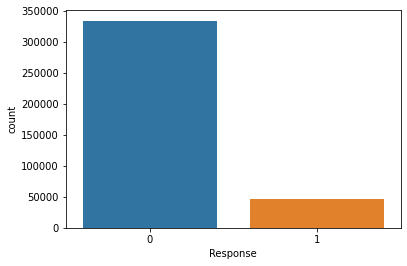

In [282]:
#count of 
sns.countplot(data["Response"])

As we can see there is high imbalnce in the responses data and we need to treat this data dor processing, else it won't provide us with accurate results.

Let's try to do some univariate analysis

By looking into the data we can state that following columns are categorical
* Gender
* Driving_License
* Previously_Insured
* Vehicle_Age
* Vehicle_Damage

In [283]:
data1 = data.copy()

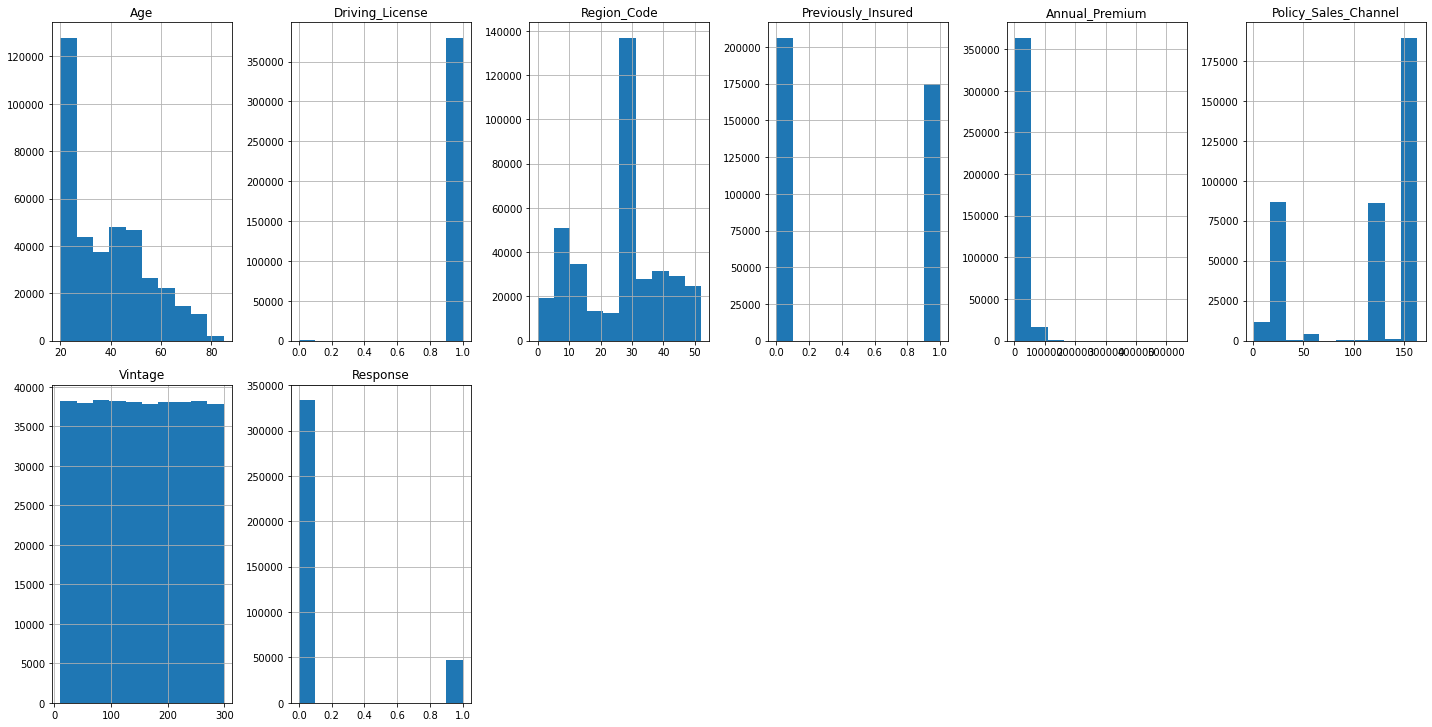

In [284]:
data.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

Few of the important observations that can be found over here:
* Age column is right skewed
* Response column is highly imbalanced column, we will try to implement SMOTE techniques further
* Driving License is also very highly imbalanced column, we will delete this column further in our code





In [285]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')


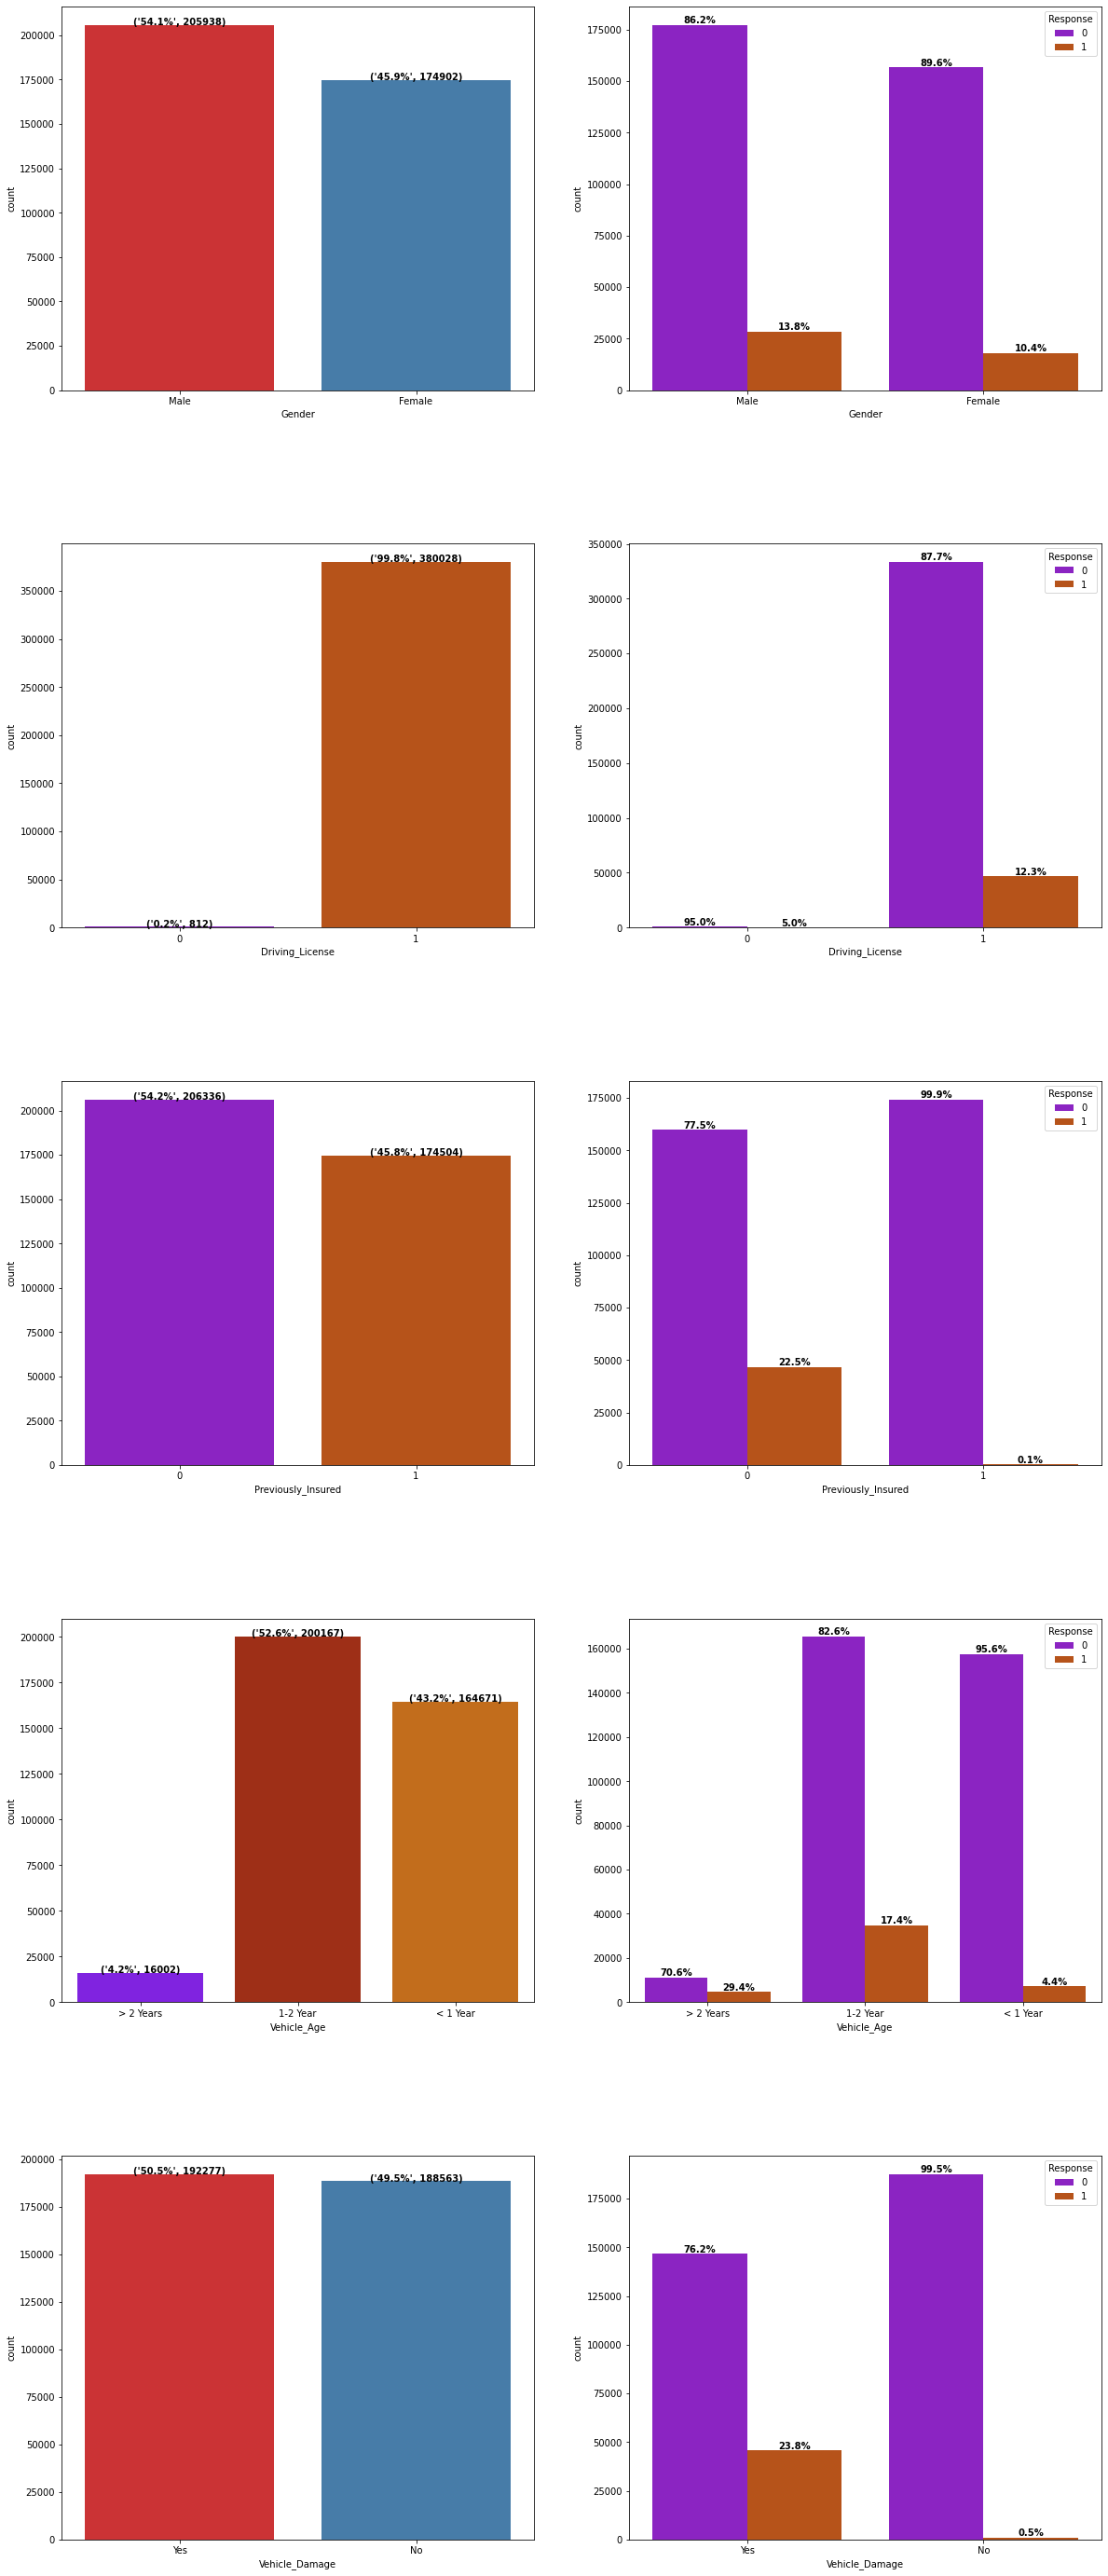

In [286]:
f,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,50), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10,10,10],'wspace': 0.2,
                       'hspace': 0.4})


a1=sns.countplot(data=data,x="Gender",ax=ax[0][0],palette="Set1")
without_hue(data,'Gender',a1)
a2=sns.countplot(data=data,x='Gender',hue='Response',palette="gnuplot",ax=ax[0][1])
with_hue(data,'Gender',a2)

b1=sns.countplot(data=data,x="Driving_License",palette="gnuplot",ax=ax[1][0])
without_hue(data,"Driving_License",b1)
b2=sns.countplot(data=data,x="Driving_License",hue='Response',palette="gnuplot",ax=ax[1][1])
with_hue(data,"Driving_License",b2)

c1=sns.countplot(data=data,x="Previously_Insured",palette="gnuplot",ax=ax[2][0])
without_hue(data,"Previously_Insured",c1)
c2=sns.countplot(data=data,x="Previously_Insured",hue='Response',palette="gnuplot",ax=ax[2][1])
with_hue(data,"Previously_Insured",c2)

d1=sns.countplot(data=data,x="Vehicle_Age",palette="gnuplot",ax=ax[3][0])
without_hue(data,"Vehicle_Age",d1)
d2=sns.countplot(data=data,x="Vehicle_Age",hue='Response',palette="gnuplot",ax=ax[3][1])
with_hue(data,"Vehicle_Age",d2)

e1=sns.countplot(data=data,x="Vehicle_Damage",ax=ax[4][0],palette="Set1")
without_hue(data,"Vehicle_Damage",e1)
e2=sns.countplot(data=data,x="Vehicle_Damage",hue='Response',palette="gnuplot",ax=ax[4][1])
with_hue(data,"Vehicle_Damage",e2)

Few **insights** can be drawn as:
* Male are norrowly more interested in taking can insurance: 13.4% vs 10.8%
* People with Driving license would be more interested in taking Motor Insurance
* As expected, people who don't have motor insurance are more interested in taking motor insurance
* More number of vehicles have age less than 2 years
* People with motor having age between 1 to 2 year are more interested in taking Motor Insurance
* Customers having their Vehicle damaged are more suspectible to take motor insurance

**Numerical Variables**<BR>
Let's try to look into the Numerical Variables and their distributions

In [287]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [288]:
# Identifying Numerical columns
numeric_cols = ["Age","Region_Code","Annual_Premium","Vintage"]
numeric_cols

['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

In [289]:
# Identifying Categorical columns
categorical_cols = ['Gender','Driving_License','Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']
categorical_cols

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel']

In [290]:
# QQ Plot to check if data is normal
# def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    # plt.figure(figsize=(15,6))
    # plt.subplot(1, 2, 1)
    # df[variable].hist()

    # plt.subplot(1, 2, 2)
    # stats.probplot(df[variable], dist="norm", plot=plt)

    # plt.show()

In [291]:
# creating distplots
# sns.distplot(data["Age"])

In [292]:
# diagnostic_plots(data, 'Age')

we can observe that data is heavly right-skewed. We need to treat it

In [293]:
# square-root transformation
# sns.distplot(np.sqrt(data["Age"]))

In [294]:
# data['Age_boxcox'], param = stats.boxcox(data.Age+1) # you can vary the exponent as needed

# print('Optimal lambda: ', param)

# diagnostic_plots(data, 'Age_boxcox')

In [295]:
# sns.distplot(data['Age_boxcox'])

In [296]:
# Exponential Transformation
# data['Exp_Age']=data['Age']**(1/5)
# diagnostic_plots(data,'sqr_Fare')

In [297]:
# creating distplots
# sns.distplot(data["Annual_Premium"])

Drawing few Box-plots 

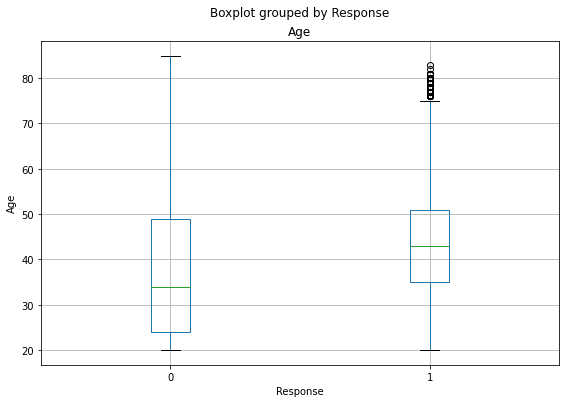

In [298]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
data.boxplot(column = 'Age', by = 'Response', ax = ax)
ax.set_ylabel("Age")
plt.show()

In [299]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Outlier Treatment** <BR>
Checking outliers for numerical columns

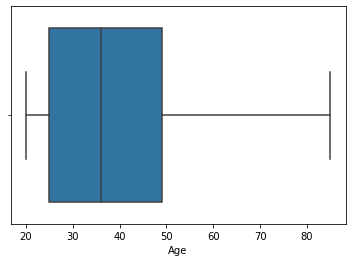

In [300]:
# Age
sns.boxplot(data['Age'])

So there doesn't seem to be any outlier present in the Age column of the dataset

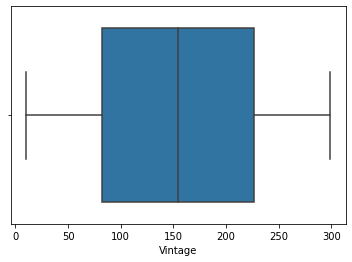

In [301]:
# Vintage
sns.boxplot(data['Vintage'])

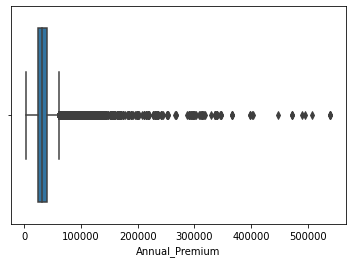

In [302]:
# Annual Premium
sns.boxplot(data["Annual_Premium"])

We can observe that there are large number of outliers present in Annual Premium as the data is rightly skewed

In [303]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,lower_range, upper_range)

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14982.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64 Age                      -11.0
Driving_License            1.0
Region_Code              -15.0
Previously_Insured        -1.5
Annual_Premium          1953.0
Policy_Sales_Channel    -155.5
Vintage                 -135.5
Response                   0.0
dtype: float64 Age                        85.0
Driving_License             1.0
Region_Code                65.0
Previously_Insured          2.5
Annual_Premium          61881.0
Policy_Sales_Channel      336.5
Vintage                   444.5
Response                    0.0
dtype: float64


In [304]:
# Adjusting Annual_Premium outliers
data['Annual_Premium']=np.where(data['Annual_Premium']> 61881.0,61881.0,data['Annual_Premium'])

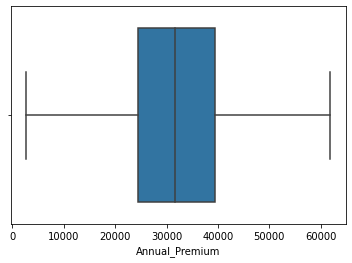

In [305]:
# Again plotting Annual Premium boxplot
sns.boxplot(data["Annual_Premium"])

### Data Cleaning

In [306]:
# Converting Vehicle Damage from Yes and No into 0 and 1 respectively
data['Vehicle_Damage'] = data['Vehicle_Damage'].apply(lambda x : 1 if x == "Yes" else 0)

In [307]:
# Converting Male and Female in Gender column to 0 and 1 respectively
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == "Female" else 0)

In [308]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [309]:
data.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

From above we know that there are 3 categories present in the column "Vehicle Age". We need to do one-hot encoding on the same.

In [310]:
# one-hot encoding
data = pd.get_dummies(data,columns=["Vehicle_Age"])

In [311]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


Before we also saw that, column name "Driving_License" was very highly imbalanced. So we can go ahead and delete that column

In [312]:
data.drop(labels="Driving_License",axis=1,inplace=True)

In [313]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,76,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,47,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,21,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,29,41.0,1,0,27496.0,152.0,39,0,0,1,0


### Feature Engineering
We can observe that columns: Age, Annual_Premium,Region_Code and Policy_Sales_Channel are also categorical columns. <br>
Since they include vast number of classes we need to treat them.
<BR>
For Age and Annual premium, they are continous numerical variables. So we will try the **Discretisation** of continuous variables using Decision Tree

In [314]:
# splitting the data into train and test so that we can fit them into a Decision Tree
X = data.loc[:,["Age","Annual_Premium","Response"]]
y = data.loc[:,["Response"]]

In [315]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 ,random_state = 2)

In [316]:
# Age Column
#v Fitting the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [317]:
## Calculating the probability
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

In [318]:
x_train.head()

,Age,Annual_Premium,Response,Age_tree
349224,45,41247.0,0,0.199556
243603,21,44182.0,0,0.036407
41286,28,27404.0,0,0.082685
191,24,28190.0,0,0.036407
49920,32,28873.0,0,0.199556


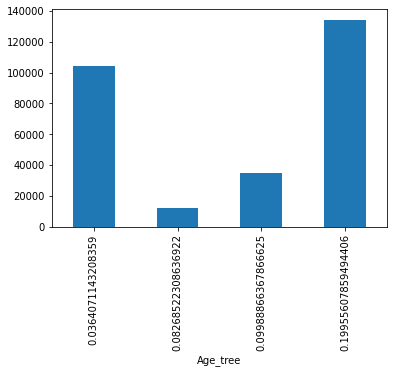

In [319]:
# checking the no of customer per bin
x_train.groupby('Age_tree')['Response'].count().plot.bar()

In [320]:
# Now we will try to use this predicted probablity to create bins
age_limit = pd.DataFrame({"Min_Age": x_train.groupby("Age_tree")["Age"].min(),"Max_Age": x_train.groupby("Age_tree")["Age"].max()})

In [321]:
age_limit

,Min_Age,Max_Age
Age_tree,,
0.036407,20,27
0.082685,28,29
0.099889,60,85
0.199556,30,59


As we can see Age can be divided into 4 bins. Now we will replace it with the bins: 1,2,3,4

In [322]:
data.loc[(data['Age']>=20) & (data['Age']<27),'Age']=1 ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age']=2 ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age']=3 ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age']=4 ## Old Age

In [323]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,3,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,4,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,3,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,3,41.0,1,0,27496.0,152.0,39,0,0,1,0


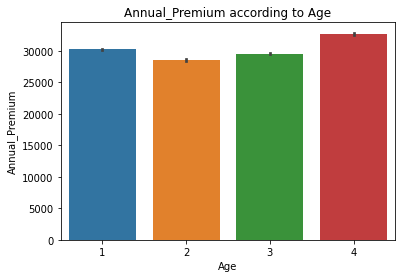

In [324]:
#Age vs Annual Premium
sns.barplot(data['Age'],data['Annual_Premium'])
plt.title('Annual_Premium according to Age')
plt.show()

As expected, we can observe the senior citizen have to pay the highest Annual Premium.
<br>
now we will try to do the same for "Annual Premium"

In [325]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train.Annual_Premium.to_frame(),y_train)

x_train['Annual_Premium_tree']=tree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]


In [326]:
x_train['Annual_Premium_tree'].unique()

array([0.13467876, 0.15037068, 0.10545783, 0.13209884])

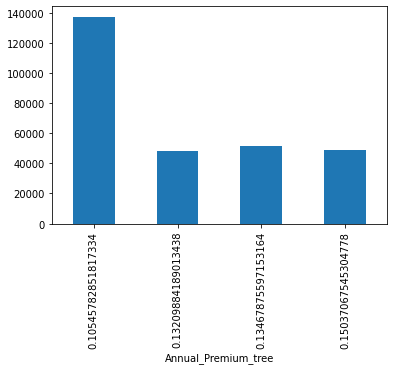

In [327]:
## checking no of customer per bin
x_train.groupby('Annual_Premium_tree')['Response'].count().plot.bar()

In [328]:
Annual_Premium_tree_limit=pd.concat([x_train.groupby('Annual_Premium_tree')['Annual_Premium'].min(),x_train.groupby('Annual_Premium_tree')['Annual_Premium'].max()],axis=1)
Annual_Premium_tree_limit

,Annual_Premium,Annual_Premium
Annual_Premium_tree,,
0.105458,10004.0,35923.0
0.132099,2630.0,9816.0
0.134679,35924.0,43343.0
0.150371,43344.0,61881.0


In [329]:
data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium']=0
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<35923.0),'Annual_Premium']=1
data.loc[(data['Annual_Premium']>=35923.0) & (data['Annual_Premium']<43343.0),'Annual_Premium']=2
data.loc[(data['Annual_Premium']>=43343.0) & (data['Annual_Premium']<=61881.0),'Annual_Premium']=3

In [330]:
# taking new look at the data
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,3,28.0,0,1,2.0,26.0,217,1,0,0,1
1,0,4,3.0,0,0,1.0,26.0,183,0,1,0,0
2,0,3,28.0,0,1,2.0,26.0,27,1,0,0,1
3,0,1,11.0,1,0,1.0,152.0,203,0,0,1,0
4,1,3,41.0,1,0,1.0,152.0,39,0,0,1,0


In [331]:
# doing one hot encoding for Annual Premium and Age
data = pd.get_dummies(data,columns=["Age","Annual_Premium"])

In [332]:
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,1,26.0,217,1,0,0,1,0,0,1,0,0,0,1,0
1,0,3.0,0,0,26.0,183,0,1,0,0,0,0,0,1,0,1,0,0
2,0,28.0,0,1,26.0,27,1,0,0,1,0,0,1,0,0,0,1,0
3,0,11.0,1,0,152.0,203,0,0,1,0,1,0,0,0,0,1,0,0
4,1,41.0,1,0,152.0,39,0,0,1,0,0,0,1,0,0,1,0,0


In [333]:
data["Region_Code"].value_counts()

28.0    106335
8.0      33857
46.0     19747
41.0     18256
15.0     13300
30.0     12177
29.0     11052
50.0     10237
3.0       9245
11.0      9229
36.0      8788
33.0      7647
47.0      7434
35.0      6939
6.0       6277
45.0      5603
37.0      5501
18.0      5150
14.0      4677
48.0      4654
39.0      4642
10.0      4372
21.0      4266
2.0       4037
13.0      4034
7.0       3275
12.0      3197
9.0       3101
27.0      2819
32.0      2784
43.0      2639
17.0      2616
26.0      2587
25.0      2502
24.0      2415
38.0      2026
0.0       2015
16.0      2005
23.0      1959
31.0      1948
20.0      1931
49.0      1831
4.0       1798
34.0      1663
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1006
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [334]:
# looking for the possibility to encoding on region codes depending upon the frequency
data["Region_Code"].value_counts(normalize=True) * 100

28.0    27.921174
8.0      8.890085
46.0     5.185117
41.0     4.793614
15.0     3.492280
30.0     3.197406
29.0     2.902006
50.0     2.688005
3.0      2.427529
11.0     2.423327
36.0     2.307531
33.0     2.007930
47.0     1.952001
35.0     1.822025
6.0      1.648199
45.0     1.471222
37.0     1.444439
18.0     1.352274
14.0     1.228075
48.0     1.222036
39.0     1.218885
10.0     1.147989
21.0     1.120155
2.0      1.060025
13.0     1.059237
7.0      0.859941
12.0     0.839460
9.0      0.814253
27.0     0.740206
32.0     0.731016
43.0     0.692942
17.0     0.686903
26.0     0.679288
25.0     0.656969
24.0     0.634125
38.0     0.531982
0.0      0.529094
16.0     0.526468
23.0     0.514389
31.0     0.511501
20.0     0.507037
49.0     0.480779
4.0      0.472114
34.0     0.436666
19.0     0.403056
22.0     0.343714
40.0     0.340038
5.0      0.335837
1.0      0.264153
44.0     0.212163
42.0     0.155183
52.0     0.070108
51.0     0.048052
Name: Region_Code, dtype: float64

Since we don't have information regarding Business case for Policy_Sales_Channel. So we will keep it in the same form

In [335]:
len(data["Policy_Sales_Channel"].unique())

155

In [336]:
data.groupby("Policy_Sales_Channel")["Response"].mean()

Policy_Sales_Channel
1.0      0.032588
2.0      0.250000
3.0      0.304015
4.0      0.200393
6.0      0.000000
           ...   
157.0    0.268384
158.0    0.274390
159.0    0.019608
160.0    0.021820
163.0    0.304183
Name: Response, Length: 155, dtype: float64

In [337]:
# Mean Encoding
# Here we are trying to group Policy_Sales_Channel through mean interest of customers
Policy_Sales_Channel_me = data.groupby("Policy_Sales_Channel")["Response"].mean()
def mean_encoding(dataset) :
    
    op_set = (dataset.assign( Policy_Sales_Channel = dataset.Policy_Sales_Channel.replace(Policy_Sales_Channel_me.index, Policy_Sales_Channel_me.values) ))
    return op_set

In [338]:
data = mean_encoding(data)
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,1,0.199395,217,1,0,0,1,0,0,1,0,0,0,1,0
1,0,3.0,0,0,0.199395,183,0,1,0,0,0,0,0,1,0,1,0,0
2,0,28.0,0,1,0.199395,27,1,0,0,1,0,0,1,0,0,0,1,0
3,0,11.0,1,0,0.028646,203,0,0,1,0,1,0,0,0,0,1,0,0
4,1,41.0,1,0,0.028646,39,0,0,1,0,0,0,1,0,0,1,0,0


### Multivariate Analysis
Let's try to do some Multivariate Analysis.

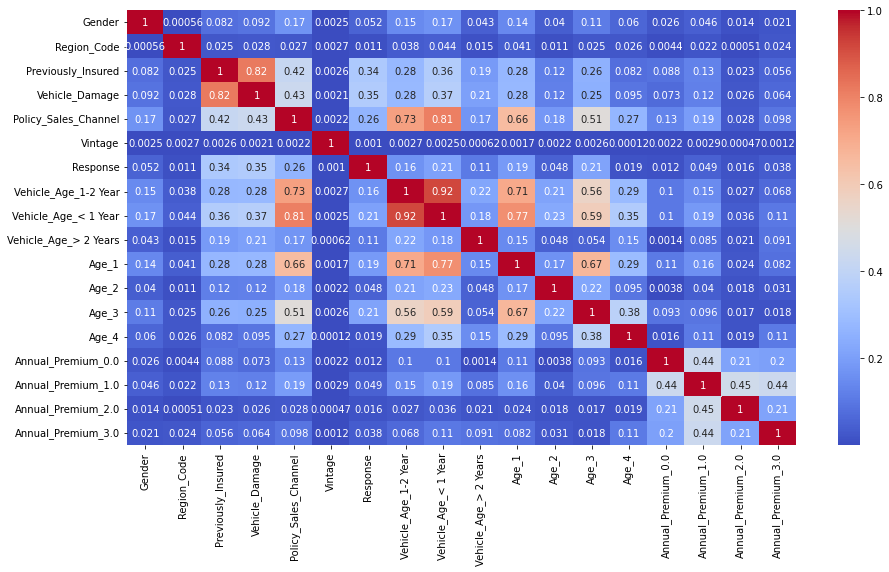

In [339]:
#Correlation matrix
corr=data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(abs(corr),annot=True,cmap="coolwarm")

As we can observe that there is strong relationship between Vehicle Damage and Previously insured

Let's try to find out which categorical values are of utmost importance.
<BR>
We will try to apply Chi-Square test

In [345]:
# Chi2 Test
from sklearn.feature_selection import chi2
predictor = data[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0']]
dependent = data["Response"]
chi_scores = chi2(predictor,dependent)
chi_scores

(array([  567.1009911 ,   282.96263157, 24021.242368  , 23686.86368435,
         4875.82504363,  9518.41947355,  4356.93689078,  9040.08930798,
          832.40146119,  9212.39056146,   119.54467452,    45.19926341,
          481.00736059,    77.85446455,   446.19458665]),
 array([2.39845642e-125, 1.69824091e-063, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.87049166e-183, 0.00000000e+000, 7.95827256e-028, 1.77972012e-011,
        1.28986640e-106, 1.10919155e-018, 4.85608811e-099]))

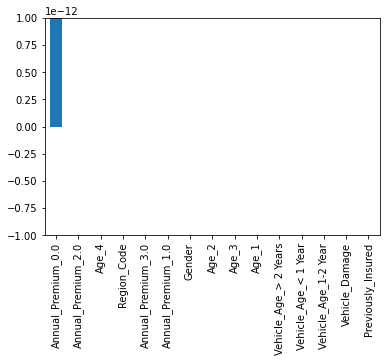

In [346]:
# determining p-values so that we can find the important features
p_values = pd.Series(chi_scores[1],index = predictor.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

As we can observe, p-values of all the variables are less. hence we can use them in model training purposes

### Model Fitting
**Handling Class Imbalance: SMOTE**

In [340]:
data.columns

Index(['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0'],
      dtype='object')

In [347]:
# Reaarranging columns
data =data[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0', 'Response']]

In [348]:
data.head() # Confirming with first 5 rows

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0,Response
0,0,28.0,0,1,0.199395,217,0,0,1,0,0,1,0,0,0,1,0,1
1,0,3.0,0,0,0.199395,183,1,0,0,0,0,0,1,0,1,0,0,0
2,0,28.0,0,1,0.199395,27,0,0,1,0,0,1,0,0,0,1,0,1
3,0,11.0,1,0,0.028646,203,0,1,0,1,0,0,0,0,1,0,0,0
4,1,41.0,1,0,0.028646,39,0,1,0,0,0,1,0,0,1,0,0,0


In [350]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Response'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 380840
Resampled dataset shape 668310
